# **LPS-3**
### **Name -** Yash Vardhan Sharma
### **Reg. No. -** 19BCE1097
### **Professor -** Dr. L Jeganathan

## **Code of Academic Integrity**
I affirm that
* This work is my own original work and is not a borrowed work,
either from other students or from assignments for other courses.
* I have not given or received any unauthorized help on this assignment.
* This submission is free from
<ul>
  <li>Plagiarism</li>
  <li>Fabrication of facts</li>
  <li>Unauthorized assistance</li>
  <li>Collusion</li>
</ul>
* This submission gives proper credit to sources and references,
acknowledges the contributions and ideas of others relevant to
this academic work.
* This submission was prepared by me fully adhering to the rules
that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in
any other behavior that subverts the purpose of the assignment
and the directions of the teacher.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing all the required libraries.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

## **1. Generate a data set which corresponds to the equation r = 3x+5, with 500 data points. You can generate this data set either using 'Symbolic_regression_classification_generator.py' or using an excel sheet. Partition the dataset into training data and test data in the ratio of 75:25.**

Generation of the dataset and division into test and training data.

In [ ]:
# Defining gen_regression_symbolic
def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    from sympy import sympify
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result
def flip(y,p):
    import numpy as np
    lst=[]
    for i in range(len(y)):
        f=np.random.choice([1,0],p=[p,1-p])
        lst.append(f)
    lst=np.array(lst)
    return np.array(np.logical_xor(y,lst),dtype=int)
def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    import numpy as np
    from sympy import Symbol,sympify
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [ ]:
x=gen_regression_symbolic(m='(3*x) + 5',n_samples=500,noise=0.1)
df=pd.DataFrame(x, columns = ['x']+ ['r'])
df

,x,r
0,-8.2202,-19.6073238507013
1,-1.77639,-0.435867005183175
2,5.22087,20.5359764381070
3,-7.10006,-16.3607624733956
4,0.543899,6.62051278222084
...,...,...
495,-4.71936,-9.09703580440518
496,5.00663,20.0213690266474
497,-1.5172,0.385311557186485
498,-1.30192,1.17296772596783


In [ ]:
test_size = int(500/4)

In [ ]:
test_df = df.iloc[-test_size:]
test_df

,x,r
375,-3.08763,-4.44712158984865
376,-3.54588,-5.60975075967536
377,-1.5314,0.416743492965355
378,-4.91609,-9.73996301484330
379,7.52472,27.3759334574804
...,...,...
495,-4.71936,-9.09703580440518
496,5.00663,20.0213690266474
497,-1.5172,0.385311557186485
498,-1.30192,1.17296772596783


In [ ]:
train_df = df.iloc[:-test_size]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       375 non-null    object
 1   r       375 non-null    object
dtypes: object(2)
memory usage: 6.0+ KB


(a) Train a simple linear regression model(choosing the hypothesis w0+w1x) with that dataset and learn the equation that fits the dataset. Check whether the coefficient of x in the equation you have fit is 3 (or nearer to 3) and the bias (in the equation you have fit ) is 5 (or nearer to 5)

In [ ]:
size = train_df['x'].size
train_df['x_sqr'] = train_df['x']**2
train_df['r_sqr'] = train_df['r']**2
train_df['xr'] = train_df['x']*train_df['r']

In [ ]:
w1 = (sum(train_df['xr'])-sum(train_df['x'])*sum(train_df['r']/size)) / (sum(train_df['x_sqr'])-(sum(train_df['x'])**2/size))
w1

2.99851323154633

In [ ]:
w0 = sum(train_df['r'])/size - w1*sum(train_df['x'])/size
w0

4.99476463699222

Hence, we can infer that the coefficient of x in the equation we got is near to 3 and the bias is near to 5.

(b) Compute the performance measure of the SLR model that you have trained.

In [ ]:
predicted = w0 + w1*test_df['x']
predicted

375    -4.26354512582120
376    -5.63761727318397
377    0.402832045638622
378    -9.74620809675337
379     27.5577458809276
             ...        
495    -9.15629658200441
496     20.0072158583898
497    0.445430465701830
498     1.09094790034858
499    -7.37316478798395
Name: x, Length: 125, dtype: object

In [ ]:
performance = sum((test_df['r']-predicted)**2)/test_size
performance

0.00772643824126613

(c) Compute the error in the training data set and the test data set.

In [ ]:
train_predicted = w0 + w1*train_df['x']
train_error = sum((train_df['r']-train_predicted)**2)/size
train_error

0.00937648844784833

In [ ]:
test_predicted = w0 + w1*test_df['x']
test_error = sum((test_df['r']-test_predicted)**2)/test_size
test_error

0.00772643824126613

(d) Repeat the above experiment by changing the size of the dataset generated by you in steps of 100, starting from 500 to 1500.In all the experiments, keep the ratio between training data to test data set as 75:25.

In [ ]:
DF = pd.DataFrame()

In [ ]:
for size in range(500,1600,100):
  x=gen_regression_symbolic(m='(3*x) + 5',n_samples=size,noise=0.1)
  df=pd.DataFrame(x, columns = ['x']+ ['r'])
  test_size = int(size/4)
  test_df = df.iloc[-test_size:]
  train_df = df.iloc[:-test_size]
  train_df['x_sqr'] = train_df['x']**2
  train_df['r_sqr'] = train_df['r']**2
  train_df['xr'] = train_df['x']*train_df['r']
  w1 = (sum(train_df['xr'])-sum(train_df['x'])*sum(train_df['r']/size)) / (sum(train_df['x_sqr'])-(sum(train_df['x'])**2/size))
  w0 = sum(train_df['r'])/size - w1*sum(train_df['x'])/size
  train_predicted = w0 + w1*train_df['x']
  train_error = sum((train_df['r']-train_predicted)**2)/size
  test_predicted = w0 + w1*test_df['x']
  test_error = sum((test_df['r']-test_predicted)**2)/test_size
  temp_df = pd.DataFrame(columns=[str(size)])
  temp_df = temp_df.T
  temp_df['size'] = size
  temp_df['test_error'] = test_error
  temp_df['train_error'] = train_error
  DF = DF.append(temp_df)

(e) Make a table with rows as the size of the dataset, columns as the training data error, test data error.

In [ ]:
DF

,size,test_error,train_error
500,500,1.58643452078853,1.17794264550778
600,600,1.55862553902941,1.18239517893155
700,700,1.56556108682148,1.17998111890619
800,800,1.58402666023903,1.18128589701133
900,900,1.54687332258221,1.18332154237041
1000,1000,1.57128920039149,1.18109003928865
1100,1100,1.56775258783388,1.17978650724354
1200,1200,1.58731223454786,1.17917259765323
1300,1300,1.57965840428143,1.17873268650369
1400,1400,1.57236551894950,1.17892349029776


(f) Plot the graphs : graph1 : size of the dataset Vs Training data error (as a 2d plot), graph2 : Size of the dataset Vs test data error (as a 2d plot), graph3: size of the dataset Vs Training data error Vs Test data error

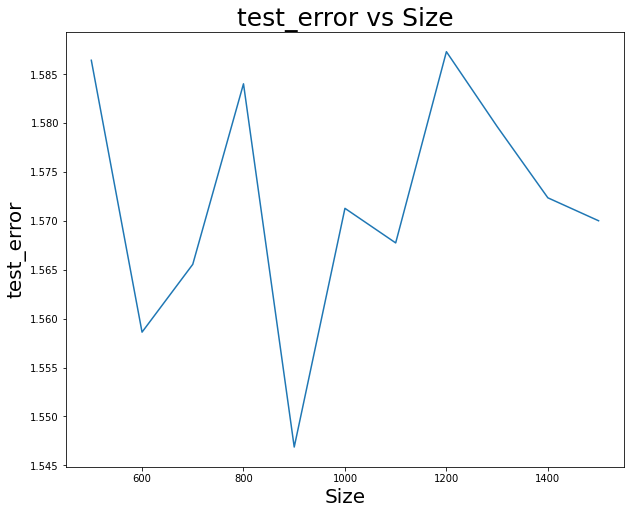

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(DF['size'],DF['test_error'])
plt.title("test_error vs Size", fontsize = 25)
plt.xlabel("Size", fontsize = 20)
plt.ylabel("test_error", fontsize = 20)
plt.show()

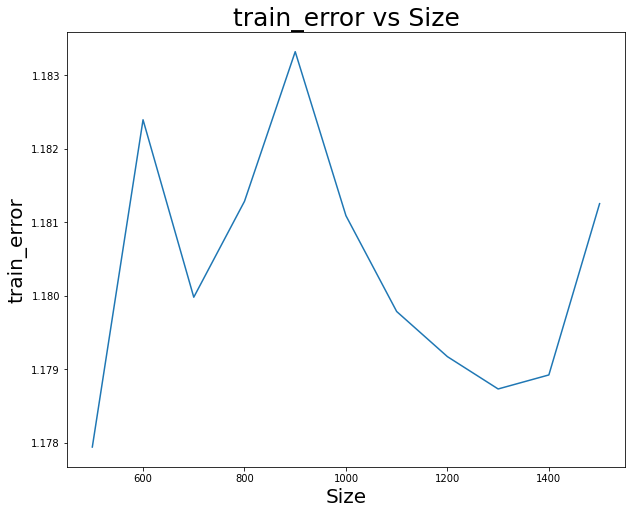

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(DF['size'],DF['train_error'])
plt.title("train_error vs Size", fontsize = 25)
plt.xlabel("Size", fontsize = 20)
plt.ylabel("train_error", fontsize = 20)
plt.show()

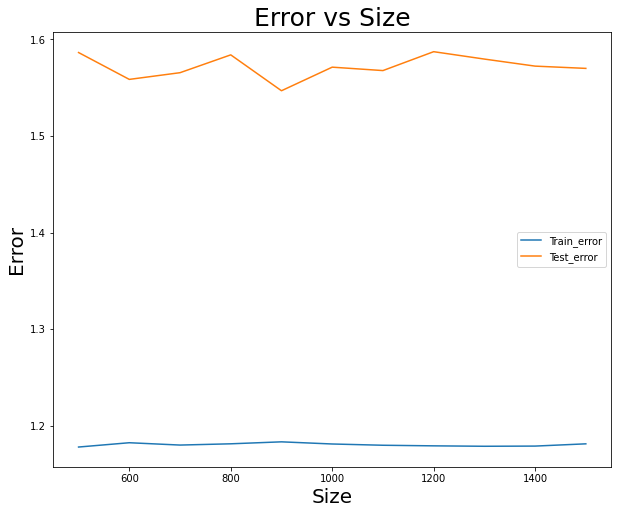

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(DF['size'],DF['train_error'], label="Train_error")
plt.plot(DF['size'],DF['test_error'], label = "Test_error")
plt.title("Error vs Size", fontsize = 25)
plt.xlabel("Size", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.legend()
plt.show()

From the above 3 graph we can infer the following:

* Error in test_error decreases with the increase in dataset size but but we still go the minimum error at size 1100.
* Error in train_error also decreases with the increase in dataset size but we go the minimum error at the size 1000.
* Overall we got the least amount of error in the size 1100.
* From the Error vs Size graph we can infer that the error gap between the test_error and train_error is quite significant.

## **2. In the Lab session , we experimented the ‘Toyato data set’ by taking ‘Ages Vs Price’, ‘Km Vs Price’, ‘Age&Km Vs price’. Train the ‘Multiple Linear Regression Model (Normal equation method)’ by taking all the input features (which are numerical alone) of the dataset with a polynomial of degree 1 (with all the terms). Compute the training data error and the test data error and conclude whether the model learns better with the test data or with the training data**

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/Toyota.csv",index_col=0,na_values=['??','???','????'])
df['Doors'] = df['Doors'].replace('three',3)
df['Doors'] = df['Doors'].replace('four',4)
df['Doors'] = df['Doors'].replace('five',5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Age'] = mean_imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
df['KM'] = mean_imputer.fit_transform(df['KM'].values.reshape(-1,1))[:,0]
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['FuelType'] = mode_imputer.fit_transform(df['FuelType'].values.reshape(-1,1))[:,0]
df['MetColor'] = mode_imputer.fit_transform(df['MetColor'].values.reshape(-1,1))[:,0]
df['Doors'] = df['Doors'].astype(int)
df.HP = df['HP'].astype('float32')
df['HP'] = mean_imputer.fit_transform(df['HP'].values.reshape(-1,1))[:,0]

In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.000000,72937.000000,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.000000,41711.000000,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.000000,48000.000000,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.000000,38500.000000,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.000000,68647.239972,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,55.672156,17016.000000,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.000000,68647.239972,Petrol,86.0,1.0,0,1300,3,1015


In [ ]:
# Droping column FuelType since It is non-numerical.
df.drop('FuelType', inplace = True, axis = 1)
df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.000000,46986.000000,90.0,1.0,0,2000,3,1165
1,13750,23.000000,72937.000000,90.0,1.0,0,2000,3,1165
2,13950,24.000000,41711.000000,90.0,1.0,0,2000,3,1165
3,14950,26.000000,48000.000000,90.0,0.0,0,2000,3,1165
4,13750,30.000000,38500.000000,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,86.0,1.0,0,1300,3,1025
1432,10845,72.000000,68647.239972,86.0,0.0,0,1300,3,1015
1433,8500,55.672156,17016.000000,86.0,0.0,0,1300,3,1015
1434,7250,70.000000,68647.239972,86.0,1.0,0,1300,3,1015


In [ ]:
size = df['Price'].size
test_size = int(size/4)
train_size = int(size*(3/4))
[test_size,train_size]

[359, 1077]

In [ ]:
test_df = df.iloc[-test_size:]
test_df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
1077,6950,80.000000,143560.000000,86.0,1.0,1,1300,3,1045
1078,7950,71.000000,139145.000000,73.0,0.0,0,2000,2,1115
1079,8950,55.672156,138500.000000,86.0,0.0,0,1300,5,1050
1080,7950,74.000000,137741.000000,90.0,1.0,0,2000,5,1135
1081,9500,80.000000,137178.000000,90.0,1.0,0,2000,5,1135
...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544.000000,86.0,1.0,0,1300,3,1025
1432,10845,72.000000,68647.239972,86.0,0.0,0,1300,3,1015
1433,8500,55.672156,17016.000000,86.0,0.0,0,1300,3,1015
1434,7250,70.000000,68647.239972,86.0,1.0,0,1300,3,1015


In [ ]:
train_df = df.iloc[:-test_size]
train_df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1072,6450,71.0,151000.0,110.0,1.0,0,1600,5,1094
1073,7900,75.0,150000.0,72.0,1.0,0,2000,3,1135
1074,6900,69.0,146304.0,72.0,1.0,0,2000,3,1115
1075,5600,75.0,146197.0,86.0,0.0,0,1300,3,1015


In [ ]:
train_data = np.asarray(train_df)
test_data = np.asarray(test_df)

In [ ]:
X = train_data[:,1:] # Every column except Price
X

array([[2.30000e+01, 4.69860e+04, 9.00000e+01, ..., 2.00000e+03,
        3.00000e+00, 1.16500e+03],
       [2.30000e+01, 7.29370e+04, 9.00000e+01, ..., 2.00000e+03,
        3.00000e+00, 1.16500e+03],
       [2.40000e+01, 4.17110e+04, 9.00000e+01, ..., 2.00000e+03,
        3.00000e+00, 1.16500e+03],
       ...,
       [6.90000e+01, 1.46304e+05, 7.20000e+01, ..., 2.00000e+03,
        3.00000e+00, 1.11500e+03],
       [7.50000e+01, 1.46197e+05, 8.60000e+01, ..., 1.30000e+03,
        3.00000e+00, 1.01500e+03],
       [7.70000e+01, 1.45996e+05, 1.10000e+02, ..., 1.60000e+03,
        4.00000e+00, 1.03500e+03]])

In [ ]:
r = train_data[:,:1] # Only Price Column
r

array([[13500.],
       [13750.],
       [13950.],
       ...,
       [ 6900.],
       [ 5600.],
       [ 5950.]])

In [ ]:
test_X = test_data[:,1:]
test_r = test_data[:,:1]

In [ ]:
ones = np.ones((len(X),1))
D = np.hstack((ones,X))
test_ones = np.ones((len(test_X),1))
test_D = np.hstack((test_ones,test_X))

In [ ]:
class LR_Norm_Eqn:

  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])

  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp

  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)

  def fit(self,D,R):
    D = np.matrix(D, dtype='float')
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [ ]:
length = D.shape[1]
lin = LR_Norm_Eqn(length)
print('weights is ',lin.fit(D,r))

weights is  [[-9.54016762e+03]
 [-1.19482815e+02]
 [-2.04451144e-02]
 [ 3.65707063e+01]
 [ 8.24502427e+01]
 [ 5.50525131e+01]
 [-1.19764950e+00]
 [-7.82986274e+01]
 [ 2.49252485e+01]]


In [ ]:
train_predicted = lin.predict(D,r)
train_predicted

matrix([[16532.62692365],
        [16002.05576069],
        [16520.99208691],
        ...,
        [ 7101.31442593],
        [ 5161.97460526],
        [ 5865.72688707]])

In [ ]:
test_predicted = lin.predict(test_D, test_r)
test_predicted

matrix([[ 5503.73450734],
        [ 7041.13446057],
        [ 8344.47234009],
        [ 7679.15229291],
        [ 6973.7660021 ],
        [ 8927.14376308],
        [ 7359.86918016],
        [ 7454.43313524],
        [ 6593.23946379],
        [ 6700.6727695 ],
        [ 7085.33185121],
        [ 5060.52866554],
        [ 7090.56516817],
        [ 6744.56779772],
        [ 7246.09335215],
        [ 7253.77051044],
        [ 6944.63894713],
        [ 6652.57773675],
        [ 6850.74637921],
        [ 6977.95744747],
        [ 7200.76060015],
        [ 7671.25420543],
        [ 9852.82699223],
        [ 7207.34829376],
        [ 7459.68502862],
        [ 7449.25738797],
        [ 5836.59870714],
        [ 5509.03992642],
        [ 6802.57612309],
        [ 6799.27105064],
        [ 9790.4765681 ],
        [ 7390.44609999],
        [ 7139.25365922],
        [ 7286.28688034],
        [ 8282.0787679 ],
        [ 7196.4465777 ],
        [ 6959.44454685],
        [ 7488.40821532],
        [ 95

In [ ]:
print(lin.measure(train_predicted,r))

2301913.8344704118


In [ ]:
print(lin.measure(test_predicted,test_r))

1672109.5998171817


From this we can conclude that the model shows higher error in training data as compared to testing data. Hence, the model works better for testing data.

## **3. Consider a dataset D which has a minimum of three input features (say: x1, x2, x3) which are numerical and which could train a regression learning model.**

In [ ]:
from sklearn.datasets import make_regression

variables, target = make_regression(n_samples=500, n_features=3, random_state=3)
D_df = pd.DataFrame(variables)
D_df['target'] = target

In [ ]:
D_df.set_axis(['X3', 'X2', 'X1', 'Y'], axis=1, inplace=False)

,X3,X2,X1,Y
0,2.177734,1.213643,-0.128632,148.805948
1,-0.344166,-1.182489,-0.359201,-94.124821
2,0.388146,1.247184,0.896749,113.196158
3,-0.384663,0.380335,0.043659,10.896209
4,-0.349032,1.767683,-1.075390,69.512979
...,...,...,...,...
495,1.384392,-0.016912,-0.155547,44.146836
496,-0.039730,-0.855533,-0.156519,-58.076277
497,0.426435,-0.678213,-0.753335,-45.628326
498,0.594821,0.214819,-1.096151,6.759782


a) Consider the data set D1 which has x1 with target variable of the dataset. Train the ‘Multiple Linear Regression Model (Normal equation ) and the ‘Simple Linear Regression’ with D1 for a polynomial of degree 1 (with all the terms) and conclude the model trained better by D1.


In [ ]:
variables1, target1 = make_regression(n_samples=500, n_features=1, random_state=3)
D1_df = pd.DataFrame(variables1)
D1_df['target1'] = target1

In [ ]:
D1_df.set_axis(['X1', 'Y'], axis=1, inplace=False)

,X1,Y
0,-0.737465,-9.217955
1,0.287558,3.594332
2,-0.230031,-2.875273
3,-0.570563,-7.131760
4,-0.475525,-5.943831
...,...,...
495,-0.272736,-3.409063
496,0.853963,10.674130
497,0.884622,11.057353
498,0.122250,1.528063


Simple Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables1, target1, test_size=0.20, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 2.972882356955253e-15
Test Mean Absolute Error 2.0872192862952942e-16
Performance 1.5908021427923912e-15


Multiple Linear Regression Model (Normal equation )

In [ ]:
test_size = 10

In [ ]:
test_D1 = D1_df.iloc[-test_size:]
test_D1

,0,target1
490,1.065420,13.317238
491,0.897150,11.213939
492,-1.159792,-14.496844
493,-1.023785,-12.796820
494,0.899338,11.241297
495,-0.272736,-3.409063
496,0.853963,10.674130
497,0.884622,11.057353
498,0.122250,1.528063
499,0.939503,11.743333


In [ ]:
data = np.asarray(D1_df)
test_data = np.asarray(test_D1)

In [ ]:
X = data[:,:-1] # input attributes include all column except last
r = data[:,-1:] # output attribute include last column only

In [ ]:
test_X = test_data[:,:-1]
test_r = test_data[:,-1:]

In [ ]:
ones = np.ones((len(X),1))

In [ ]:
D = np.hstack((ones,X))

In [ ]:
ones = np.ones((len(test_X),1))

In [ ]:
test_D = np.hstack((ones,test_X))

In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])

  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp

  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)
    
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [ ]:
length = D.shape[1]
lin = LR_Norm_Eqn(length)
print('',lin.fit(D,r))

 [[-3.36926372e-16]
 [ 1.24995177e+01]]


In [ ]:
predicted = lin.predict(D,r)

In [ ]:
k1 = mae(predicted, r)
k1

1.0213815904158707e-14

D1 (x1 and y) with Normal Equation Works better than Simple Linear Regression

b) Consider the data set D2 which has x1 & x2 with target variable of the dataset. Train the ‘Multiple Linear Regression Model (Normal equation ) with D2 for a polynomial of degree 2 (with all the terms).


In [ ]:
variables2, target2 = make_regression(n_samples=500, n_features=2, random_state=3)
D2_df = pd.DataFrame(variables2)
D2_df['target2'] = target2

In [ ]:
D2_df.set_axis(['X1', 'X2', 'Y'], axis=1, inplace=False)

,X1,X2,Y
0,-0.252816,-1.864806,-173.791874
1,-0.387127,0.388250,13.706491
2,-0.035177,0.816818,68.666030
3,-0.437695,-1.366487,-140.253064
4,1.707852,0.590855,138.261185
...,...,...,...
495,1.947770,-1.589577,-37.574464
496,-0.164001,0.598090,43.212805
497,1.366243,0.768965,136.166059
498,0.350235,-0.695176,-42.069500


In [ ]:
test_size = 10

In [ ]:
test_D2 = D2_df.iloc[-test_size:]
test_D2

,0,1,target2
490,0.761609,-1.359201,-78.326774
491,-0.237960,-0.631402,-66.631229
492,-1.075724,1.193253,47.956255
493,0.054505,0.227724,22.430731
494,-1.914472,-0.602885,-149.859517
495,1.947770,-1.589577,-37.574464
496,-0.164001,0.598090,43.212805
497,1.366243,0.768965,136.166059
498,0.350235,-0.695176,-42.069500
499,-1.492397,0.936633,4.521917


In [ ]:
data2 = np.asarray(D2_df)
test_data2 = np.asarray(test_D2)

In [ ]:
X2 = data2[:,:-1] # input attributes include all column except last
r2 = data2[:,-1:] # output attribute include last column only

In [ ]:
test_X2 = test_data2[:,:-1]
test_r2 = test_data2[:,-1:]

In [ ]:
ones2 = np.ones((len(X2),1))

In [ ]:
D2 = np.hstack((ones2,X2))

In [ ]:
ones2 = np.ones((len(test_X2),1))

In [ ]:
test_D2 = np.hstack((ones2,test_X2))

In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])

  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp

  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)
    
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [ ]:
length2 = D2.shape[1]
lin2 = LR_Norm_Eqn(length2)
print('',lin.fit(D2,r2))

 [[9.26804085e-15]
 [5.11110937e+01]
 [8.62664482e+01]]


In [ ]:
predicted = lin.predict(D2,r2)

In [ ]:
k2 = mae(predicted, r2)
k2

3.0161650954596556e-14

c) Consider the data set D3 which has x1, x2 & x3 with target variable of the dataset. Train the ‘Multiple Linear Regression Model (Normal equation) with D2 for a polynomial of degree 1 (with all the terms).

In [ ]:
variables3, target3 = make_regression(n_samples=500, n_features=3, random_state=3)
D3_df = pd.DataFrame(variables3)
D3_df['target3'] = target3

In [ ]:
D3_df.set_axis(['X1', 'X2', 'X3', 'Y'], axis=1, inplace=False)

,X1,X2,X3,Y
0,2.177734,1.213643,-0.128632,148.805948
1,-0.344166,-1.182489,-0.359201,-94.124821
2,0.388146,1.247184,0.896749,113.196158
3,-0.384663,0.380335,0.043659,10.896209
4,-0.349032,1.767683,-1.075390,69.512979
...,...,...,...,...
495,1.384392,-0.016912,-0.155547,44.146836
496,-0.039730,-0.855533,-0.156519,-58.076277
497,0.426435,-0.678213,-0.753335,-45.628326
498,0.594821,0.214819,-1.096151,6.759782


In [ ]:
test_size = 10

In [ ]:
test_D3 = D3_df.iloc[-test_size:]
test_D3

,0,1,2,target3
490,-0.335806,0.507286,-2.488991,-43.264693
491,-1.005240,0.413934,0.592657,4.768098
492,0.176509,0.065472,-0.662761,-6.378438
493,2.089649,1.598235,-0.733070,154.178483
494,-0.294033,0.786363,-0.687860,20.731517
495,1.384392,-0.016912,-0.155547,44.146836
496,-0.039730,-0.855533,-0.156519,-58.076277
497,0.426435,-0.678213,-0.753335,-45.628326
498,0.594821,0.214819,-1.096151,6.759782
499,-0.588502,-0.560373,-1.546556,-94.320371


In [ ]:
data3 = np.asarray(D3_df)
test_data3 = np.asarray(test_D3)

In [ ]:
X3 = data3[:,:-1] # input attributes include all column except last
r3 = data3[:,-1:] # output attribute include last column only

In [ ]:
test_X3 = test_data3[:,:-1]
test_r3 = test_data2[:,-1:]

In [ ]:
ones3 = np.ones((len(X3),1))

In [ ]:
D3 = np.hstack((ones3,X3))

In [ ]:
ones3 = np.ones((len(test_X3),1))

In [ ]:
test_D3 = np.hstack((ones3,test_X3))

In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])

  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp

  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)
    
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [ ]:
length3 = D2.shape[1]
lin3 = LR_Norm_Eqn(length3)
print('',lin.fit(D3,r3))

 [[2.33146835e-15]
 [3.54686693e+01]
 [6.16332969e+01]
 [2.51587043e+01]]


In [ ]:
predicted = lin.predict(D3,r3)

In [ ]:
k3 = mae(predicted, r3)
k3

1.6869505792271866e-14

Based on the above experiments, conclude which model (SLR, MLR) learns better with which data set (among D1,D2, D3) and which hypothesis.

Therefore, D1 (x1 and Y) with Multiple Linear Equation (Normal Equation) performs the best.

## **4. Generate a dataset D with ‘make_regression’ which has 1000 data-points and two input features. partition the dataset in to training data and test data in the ratio of 80:20. Use D to train multiple linear regression model with**

a) A polynomial of degree 1 (with all the terms)

In [ ]:
from sklearn.datasets import make_regression

variables, target = make_regression(n_samples=1000, n_features=1)
df = pd.DataFrame(variables)
df['target'] = target

In [ ]:
df.set_axis(['X1','Y'], axis=1, inplace=False)

,X1,Y
0,-0.406315,-40.090911
1,0.285929,28.212423
2,-1.513150,-149.301721
3,1.254759,123.806432
4,0.843453,83.223103
...,...,...
995,0.845536,83.428615
996,-0.773371,-76.308103
997,-0.752144,-74.213657
998,-0.237605,-23.444391


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.20, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 1.0583639575899394e-15
Test Mean Absolute Error 6.671442911998504e-16
Performance 8.627541243948949e-16


b) A polynomial of degree 2 (with all the terms)

In [ ]:
variables2, target2 = make_regression(n_samples=1000, n_features=2)
df2 = pd.DataFrame(variables2)
df2['target2'] = target2

In [ ]:
df2.set_axis(['X1','x2^2','Y'], axis=1, inplace=False)

,X1,x2^2,Y
0,-0.513683,-1.903856,-150.462534
1,0.314227,1.934427,147.220554
2,1.323566,-0.693149,-13.630499
3,-0.090140,0.298611,18.949095
4,-1.133070,0.250031,-12.943204
...,...,...,...
995,-0.111028,-0.690614,-52.528118
996,-1.592342,-0.901212,-107.975864
997,1.668453,0.968638,114.882275
998,0.082426,1.500476,109.800338


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(variables2, target2, test_size=0.20, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train2, y_train2)
train_predict2 = lr1.predict(X_train2)
k2 = mae(train_predict2, y_train2)
print('Training Mean Absolute Error', k2)
# Predicting over the Test Set and calculating error
lr2.fit(X_test2, y_test2)
test_predict2 = lr2.predict(X_test2)
l2 = mae(test_predict2,y_test2)
print('Test Mean Absolute Error', l2)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k2+l2)/2)

Training Mean Absolute Error 1.7238571681232885e-14
Test Mean Absolute Error 1.2087553180606392e-14
Performance 1.4663062430919638e-14


c) A polynomial of degree 3 (with all the terms)

In [ ]:
variables3, target3 = make_regression(n_samples=1000, n_features=3)
df3 = pd.DataFrame(variables3)
df3['target3'] = target3

In [ ]:
df3.set_axis(['X1','X2^2','X3^3','Y'], axis=1, inplace=False)

,X1,X2^2,X3^3,Y
0,0.592792,1.014755,-0.804446,35.462193
1,1.736132,1.243610,-0.108571,103.902819
2,-0.872654,0.191513,0.922820,4.088602
3,-0.073990,-1.394592,0.300641,-46.672971
4,0.554378,1.312862,1.273171,106.083841
...,...,...,...,...
995,0.389762,1.469988,0.728416,90.463556
996,-0.340604,0.703663,-2.293227,-51.996531
997,0.464138,-0.474274,-1.319801,-40.495567
998,-0.423070,-0.425280,2.421731,39.956187


In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(variables3, target3, test_size=0.20, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train3, y_train3)
train_predict3 = lr1.predict(X_train3)
k3 = mae(train_predict3, y_train3)
print('Training Mean Absolute Error', k3)
# Predicting over the Test Set and calculating error
lr2.fit(X_test3, y_test3)
test_predict3 = lr2.predict(X_test3)
l3 = mae(test_predict3,y_test3)
print('Test Mean Absolute Error', l3)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k3+l3)/2)

Training Mean Absolute Error 2.4047951130423685e-14
Test Mean Absolute Error 3.992705038119437e-14
Performance 3.198750075580903e-14


## **5. Generate a dataset D with ‘make_regression’ (choose the noise parameter as zero) which has 1000 data points with two input features. Create a sequence of datasets D1,D2,D3,D4,D5 from D by injecting 20%, 40%, 60%,80% 0%,100% of noise respectively**

Create a Dataframe D with noise parameter zero

In [ ]:
data=make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.0, shuffle=True, coef=False, random_state=4)
D = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,5)])
D['y'] = data[1]
D

,x1,x2,x3,x4,y
0,0.467241,-1.473583,-0.400955,0.122534,-8.233396
1,-0.562864,0.824745,0.067969,-0.451925,-32.668176
2,-1.135040,-0.703702,1.021038,-1.863831,-101.635163
3,-1.044241,-1.572799,-0.254212,0.070336,-5.800989
4,-1.282083,-0.252198,2.115736,-0.241259,75.468655
...,...,...,...,...,...
995,-0.095225,1.387069,1.649444,-0.031263,71.226014
996,-0.998075,-0.395259,1.968719,1.672906,220.131219
997,0.471661,1.200509,0.300600,0.695093,68.347315
998,-1.360243,-0.350150,-1.032448,-0.329359,-72.150524


Create a sequence of datasets D1,D2,D3,D4,D5,D6 from D by injecting 20%, 40%, 60%,80% 0%,100% of noise respectively.

In [ ]:
data1=make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.20, shuffle=True, coef=False, random_state=4)
D1 = pd.DataFrame(data1[0],columns=['x'+str(i) for i in range(1,5)])
D1['y'] = data1[1]
D1

,x1,x2,x3,x4,y
0,1.127837,-0.232149,0.473724,-2.023701,-53.116513
1,1.182058,0.193591,1.508304,1.701117,195.069255
2,-1.457026,0.176848,-1.315596,0.828345,-67.061219
3,-1.478528,-0.086038,-0.147711,-1.016350,-56.860516
4,0.593135,-1.307753,1.556578,-1.446482,58.350209
...,...,...,...,...,...
995,-0.619359,-0.090482,-1.184548,-0.415463,-111.738686
996,-0.687013,-0.123943,1.113454,-1.364929,27.033766
997,0.371865,0.515552,0.970380,0.129937,82.570151
998,0.046386,-0.305643,0.550966,-1.536895,-24.960745


In [ ]:
data2 = make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.40, shuffle=True, coef=False, random_state=4)
D2 = pd.DataFrame(data2[0],columns=['x'+str(i) for i in range(1,5)])
D2['y'] = data2[1]
D2

,x1,x2,x3,x4,y
0,1.127837,-0.232149,0.473724,-2.023701,-53.242608
1,1.182058,0.193591,1.508304,1.701117,194.968213
2,-1.457026,0.176848,-1.315596,0.828345,-67.191862
3,-1.478528,-0.086038,-0.147711,-1.016350,-56.641133
4,0.593135,-1.307753,1.556578,-1.446482,58.348739
...,...,...,...,...,...
995,-0.619359,-0.090482,-1.184548,-0.415463,-111.327938
996,-0.687013,-0.123943,1.113454,-1.364929,27.081734
997,0.371865,0.515552,0.970380,0.129937,82.668657
998,0.046386,-0.305643,0.550966,-1.536895,-24.783889


In [ ]:
data3 = make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.60, shuffle=True, coef=False, random_state=4)
D3 = pd.DataFrame(data3[0],columns=['x'+str(i) for i in range(1,5)])
D3['y'] = data3[1]
D3

,x1,x2,x3,x4,y
0,1.127837,-0.232149,0.473724,-2.023701,-53.368702
1,1.182058,0.193591,1.508304,1.701117,194.867171
2,-1.457026,0.176848,-1.315596,0.828345,-67.322505
3,-1.478528,-0.086038,-0.147711,-1.016350,-56.421750
4,0.593135,-1.307753,1.556578,-1.446482,58.347269
...,...,...,...,...,...
995,-0.619359,-0.090482,-1.184548,-0.415463,-110.917190
996,-0.687013,-0.123943,1.113454,-1.364929,27.129703
997,0.371865,0.515552,0.970380,0.129937,82.767164
998,0.046386,-0.305643,0.550966,-1.536895,-24.607033


In [ ]:
data4 = make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.80, shuffle=True, coef=False, random_state=4)
D4 = pd.DataFrame(data4[0],columns=['x'+str(i) for i in range(1,5)])
D4['y'] = data4[1]
D4

,x1,x2,x3,x4,y
0,1.127837,-0.232149,0.473724,-2.023701,-53.494797
1,1.182058,0.193591,1.508304,1.701117,194.766129
2,-1.457026,0.176848,-1.315596,0.828345,-67.453148
3,-1.478528,-0.086038,-0.147711,-1.016350,-56.202367
4,0.593135,-1.307753,1.556578,-1.446482,58.345799
...,...,...,...,...,...
995,-0.619359,-0.090482,-1.184548,-0.415463,-110.506442
996,-0.687013,-0.123943,1.113454,-1.364929,27.177671
997,0.371865,0.515552,0.970380,0.129937,82.865670
998,0.046386,-0.305643,0.550966,-1.536895,-24.430178


In [ ]:
data5 = make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=0.00, shuffle=True, coef=False, random_state=4)
D5 = pd.DataFrame(data5[0],columns=['x'+str(i) for i in range(1,5)])
D5['y'] = data5[1]
D5

,x1,x2,x3,x4,y
0,0.467241,-1.473583,-0.400955,0.122534,-8.233396
1,-0.562864,0.824745,0.067969,-0.451925,-32.668176
2,-1.135040,-0.703702,1.021038,-1.863831,-101.635163
3,-1.044241,-1.572799,-0.254212,0.070336,-5.800989
4,-1.282083,-0.252198,2.115736,-0.241259,75.468655
...,...,...,...,...,...
995,-0.095225,1.387069,1.649444,-0.031263,71.226014
996,-0.998075,-0.395259,1.968719,1.672906,220.131219
997,0.471661,1.200509,0.300600,0.695093,68.347315
998,-1.360243,-0.350150,-1.032448,-0.329359,-72.150524


In [ ]:
data6 = make_regression(n_samples=1000, n_features=4, n_informative=2,n_targets=1,bias=0.0, effective_rank=None,tail_strength=0.5,noise=1, shuffle=True, coef=False, random_state=4)
D6 = pd.DataFrame(data6[0],columns=['x'+str(i) for i in range(1,5)])
D6['y'] = data6[1]
D6

,x1,x2,x3,x4,y
0,1.127837,-0.232149,0.473724,-2.023701,-53.620892
1,1.182058,0.193591,1.508304,1.701117,194.665087
2,-1.457026,0.176848,-1.315596,0.828345,-67.583791
3,-1.478528,-0.086038,-0.147711,-1.016350,-55.982984
4,0.593135,-1.307753,1.556578,-1.446482,58.344328
...,...,...,...,...,...
995,-0.619359,-0.090482,-1.184548,-0.415463,-110.095695
996,-0.687013,-0.123943,1.113454,-1.364929,27.225639
997,0.371865,0.515552,0.970380,0.129937,82.964176
998,0.046386,-0.305643,0.550966,-1.536895,-24.253322


a) Using D,D1,D2,D3,D4,D5,D6 Train the 'multiple linear regression model’ separately with a polynomial of degree 1. In each experiment , have the training data and the test in the ratio of 75:25.

In [ ]:
np
# Training D1
X_traind1, X_testd1, y_traind1, y_testd1 = train_test_split(data1[0],data1[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind1, y_traind1)
train_predictd1 = lr1.predict(X_traind1)
kd1 = mae(train_predictd1, y_traind1)
print('Training Mean Absolute Error', kd1)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd1, y_testd1)
test_predictd1 = lr2.predict(X_testd1)
ld1 = mae(test_predictd1,y_testd1)
print('Test Mean Absolute Error', ld1)

Training Mean Absolute Error 0.15453992863012403
Test Mean Absolute Error 0.15781985330198373


In [ ]:
# Training D2
X_traind2, X_testd2, y_traind2, y_testd2 = train_test_split(data2[0],data2[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind2, y_traind2)
train_predictd2 = lr1.predict(X_traind2)
kd2 = mae(train_predictd2, y_traind2)
print('Training Mean Absolute Error', kd2)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd2, y_testd2)
test_predictd2 = lr2.predict(X_testd2)
ld2 = mae(test_predictd2,y_testd2)
print('Test Mean Absolute Error', ld2)

Training Mean Absolute Error 0.30907985726026455
Test Mean Absolute Error 0.3156397066039657


In [ ]:
# Training D3
X_traind3, X_testd3, y_traind3, y_testd3 = train_test_split(data3[0],data3[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind3, y_traind3)
train_predictd3 = lr1.predict(X_traind3)
kd3 = mae(train_predictd3, y_traind3)
print('Training Mean Absolute Error', kd3)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd3, y_testd3)
test_predictd3 = lr2.predict(X_testd3)
ld3 = mae(test_predictd3,y_testd3)
print('Test Mean Absolute Error', ld3)

Training Mean Absolute Error 0.4636197858904045
Test Mean Absolute Error 0.47345955990594496


In [ ]:
# Training D4
X_traind4, X_testd4, y_traind4, y_testd4 = train_test_split(data4[0],data4[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind4, y_traind4)
train_predictd4 = lr1.predict(X_traind4)
kd4 = mae(train_predictd4, y_traind4)
print('Training Mean Absolute Error', kd4)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd4, y_testd4)
test_predictd4 = lr2.predict(X_testd4)
ld4 = mae(test_predictd4,y_testd4)
print('Test Mean Absolute Error', ld4)

Training Mean Absolute Error 0.6181597145205437
Test Mean Absolute Error 0.63127941320793


In [ ]:
# Training D5
X_traind5, X_testd5, y_traind5, y_testd5 = train_test_split(data5[0],data5[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind5, y_traind5)
train_predictd5 = lr1.predict(X_traind5)
kd5 = mae(train_predictd5, y_traind5)
print('Training Mean Absolute Error', kd5)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd5, y_testd5)
test_predictd5 = lr2.predict(X_testd5)
ld5 = mae(test_predictd5,y_testd5)
print('Test Mean Absolute Error', ld5)

Training Mean Absolute Error 4.161989271741125e-14
Test Mean Absolute Error 4.341771386862092e-14


In [ ]:
# Training D6
X_traind6, X_testd6, y_traind6, y_testd6 = train_test_split(data3[0],data3[1], test_size=0.25, random_state=4)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_traind6, y_traind6)
train_predictd6 = lr1.predict(X_traind6)
kd6 = mae(train_predictd6, y_traind6)
print('Training Mean Absolute Error', kd6)
# Predicting over the Test Set and calculating error
lr2.fit(X_testd6, y_testd6)
test_predictd6 = lr2.predict(X_testd6)
ld6 = mae(test_predictd6,y_testd6)
print('Test Mean Absolute Error', ld6)

Training Mean Absolute Error 0.4636197858904045
Test Mean Absolute Error 0.47345955990594496


b) Compute the performance of the model as the average of the training data error and the test data error.

In [ ]:
# Performance for D1
print('Performance in D1', (kd1+ld1)/2)
# Performance for D2
print('Performance in D2', (kd2+ld2)/2)
# Performance for D3
print('Performance in D3', (kd3+ld3)/2)
# Performance for D4
print('Performance in D4', (kd4+ld4)/2)
# Performance for D5
print('Performance in D5', (kd5+ld5)/2)
# Performance for D6
print('Performance in D6', (kd6+ld6)/2)

Performance in D1 0.1561798909660539
Performance in D2 0.3123597819321151
Performance in D3 0.4685396728981747
Performance in D4 0.6247195638642369
Performance in D5 4.2518803293016084e-14
Performance in D6 0.4685396728981747


c) Plot the graph : noise Vs error

In [ ]:
dat = {'Noise':[0.20, 0.40, 0.60, 0.80, 0.00, 1.00], 'Error':[0.1561798909660539, 0.3123597819321151, 0.4685396728981747, 0.6247195638642369, 4.2518803293016084e-14, 0.4685396728981747]}
graph = pd.DataFrame(dat)
graph

,Noise,Error
0,0.2,1.561799e-01
1,0.4,3.123598e-01
2,0.6,4.685397e-01
3,0.8,6.247196e-01
4,0.0,4.251880e-14
5,1.0,4.685397e-01


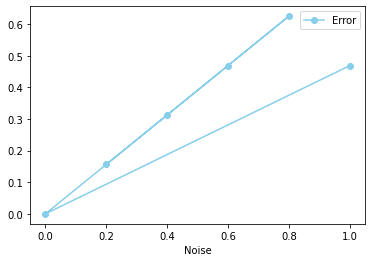

In [ ]:
graph.plot( 'Noise', 'Error', marker='o', color='skyblue')

d) Based on the results of the experiment, comment on the statement: ‘ more noise in the data set, less accuracy’

We can see in the graph plotted above that with increasing noise the error also increase but there is a slight deviation from noise = 0.8 to noise = 1 which is an exception. Rest the the model completely supports the statement "more noise in the data set, less accuracy".

## **6. Generate a data set D which corresponds to the equation r = 3(x1)^2 + 4.2(x2)^2, with 1000 data points. You can generate this data set either using ‘Symbolic regression classification generator.py’ or using an excel sheet. Partition the dataset into training data and the test data in the ratio of 75:25. One polynomial of degree 2 in x1, x2 is w0 + w1x1 + w2x2 + w3x1x2, w4(x1)^2 + w5(x2)^2. w0 + w1(x1)^2 + w2x2 is another polynomial of degree 2. Like this, we can have 25 different polynomials. Using this data set D, train the multiple linear regression model with any five different polynomials of degree 2 (of the 5 polynomials, one polynomial should have the terms with w4, w5 alone) and conclude which polynomial fits the data set better.**

In [ ]:
# Defining gen_regression_symbolic
def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    from sympy import sympify
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result
def flip(y,p):
    import numpy as np
    lst=[]
    for i in range(len(y)):
        f=np.random.choice([1,0],p=[p,1-p])
        lst.append(f)
    lst=np.array(lst)
    return np.array(np.logical_xor(y,lst),dtype=int)
def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    import numpy as np
    from sympy import Symbol,sympify
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [ ]:
x = gen_regression_symbolic(m='3*(x1)^2 + 4.2*(x2)^2', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,-7.98226,4.01856,320.333473700965
1,2.16273,5.41662,248.654084713850
2,-8.10287,5.79132,465.151579670520
3,-4.16923,1.79077,77.7447032893351
4,-2.85111,-2.58784,77.8411449623353
...,...,...,...
995,4.45871,-3.02066,132.594208043491
996,-6.16778,-2.04391,147.453976423507
997,-15.4105,-1.275,725.371582626704
998,3.54936,3.88509,158.471140187149


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 9.07904862401665e-14
Test Mean Absolute Error 2.0658452726252108e-13
Performance 1.486875067513438e-13


##### Polynomial 1 : 1 + 2(x1) + 3(x2) + 4(x1)(x2) 

In [ ]:
x = gen_regression_symbolic(m='1+ 2*(x1) + 3*(x2) + 4*(x1)*(x2)', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,-0.234634,-11.7424,-23.6159359972650
1,-0.178596,3.39012,8.56033225114037
2,-5.35973,5.34965,-108.345795595179
3,-1.76222,3.86283,-18.3224535539904
4,-4.16915,6.63644,-98.1233564842613
...,...,...,...
995,2.70722,-1.5115,-14.3365866733869
996,13.1077,-5.46874,-275.917817825028
997,-0.459045,-3.41523,-4.03530346446655
998,-0.736879,2.74556,-0.308396246317571


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 1.7214596646312568e-14
Test Mean Absolute Error 2.6117358276067647e-14
Performance 2.1665977461190106e-14


##### Polynomial 2 : 5(x1)^2 + 6(x2)^2 

In [ ]:
x = gen_regression_symbolic(m='5*(x1)^2 + 6*(x2)^2', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,-1.55505,-0.974291,17.7668372974218
1,-2.41354,-3.16964,89.3461455700907
2,6.74176,3.85825,316.564350701448
3,1.95553,-6.65001,284.325674053414
4,-3.45855,7.16647,367.967772124811
...,...,...,...
995,-7.49014,-2.12293,307.390648949147
996,11.9463,1.25735,722.986681779228
997,2.22273,-0.487956,26.1062019810999
998,2.09444,0.7311,25.2574073278543


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 2.2415132712912586e-13
Test Mean Absolute Error 1.9069701373553016e-13
Performance 2.0742417043232802e-13


##### Polynomial 3 : 1 + 2(x1)^2 + 3(x2)

In [ ]:
x = gen_regression_symbolic(m='1 + 2*(x1)^2 + 3*(x2)', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,-9.30354,3.45145,184.445947876541
1,0.50702,5.90446,19.2537755835561
2,6.27975,2.11188,86.3236875152465
3,-4.10675,4.24821,47.5623525921119
4,7.08516,3.52572,111.948114294127
...,...,...,...
995,2.94592,-11.1583,-15.1161932833097
996,0.341494,1.33997,5.32084554063822
997,-7.88096,3.22858,134.853496056334
998,2.5305,1.10489,17.1545321410305


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 2.986899616530536e-14
Test Mean Absolute Error 3.1415647860910665e-14
Performance 3.064232201310801e-14


##### Polynomial 4 : 1 + 2(x1) + 3(x2)^2

In [ ]:
x = gen_regression_symbolic(m='1 + 2*(x1) + 3*(x2)^2', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,0.0204448,2.99298,27.7377007579925
1,2.16887,1.26765,10.2354395599511
2,-0.398569,1.20702,4.66240625797895
3,-0.93228,-0.0335499,-0.888121537461473
4,-0.45875,-4.96528,73.9741367562146
...,...,...,...
995,1.60625,-6.10997,116.371807158710
996,4.65676,-10.5457,344.066163586030
997,-0.604621,-3.50359,36.7276098985369
998,-3.36451,0.482465,-4.82646331319468


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 9.019359796062313e-14
Test Mean Absolute Error 4.4734010939961877e-13
Performance 2.6876685368012097e-13


##### Polynomial 5 : 2(x1) + 3(x2) + 4(x1)(x2)

In [ ]:
x = gen_regression_symbolic(m='1 + 3*(x1) + 4*(x1)*(x2)', n_samples=1000, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['r'])
df6

,x1,x2,r
0,-12.7588,-2.13006,71.5709400979640
1,1.1935,5.19914,29.2897257538065
2,-7.84115,6.37837,-222.561789704444
3,-2.17943,-3.68889,26.6271330079534
4,-1.83645,0.333272,-7.02130510359189
...,...,...,...
995,-3.07519,-0.239231,-5.52371046803279
996,0.617613,2.16531,8.21595003997708
997,-5.71458,-1.04299,7.67106071428411
998,-0.482418,4.71372,-9.56347762664198


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, df6['r'], test_size=0.25)

# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)

# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)

# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)

#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 3.906374298108991e-14
Test Mean Absolute Error 1.9570040032945713e-14
Performance 2.931689150701781e-14


Therefore Polynimial 2 has the best performance.

## **7. Generate a dataset D using ‘make-regression’ with 1000 datapoints and one input variable. Partiiton D into training data set and the test data set in the ratio of 70:30. Use D to train a ‘multiple Linear Regression model’ with**

#### **(a) Polynomial of degree 1 (with all the terms w0 + w1x )**
#### **(b) Polynomial of degree 2 (with all the terms w0 + w1x + w2x^2)**
#### **(c) Polynomial of degree 3 (with all the terms w0 + w1x + w2x^2 + w3x^3)**

#### **Based on the above three experiments, Conclude the polynomial (of the above three polynomial) which best fits the data set D. For each experiment, plot the graph that involves the true function (you can know the equation that governs D from the ‘coefficient’ parameter of ‘make-regression’), polynomial that got fit by you along with data points of D (observations). A template of a 5 sample plot is given. . For each experiment, conculde whether the performance of the model is ‘under-fitting’ or ‘over-fitting’.**

In [ ]:
data = make_regression(n_samples=1000, n_features=1,bias=0.0,noise=50, shuffle=True, coef=False)
D = pd.DataFrame(data[0],columns=['x' for i in range(1,2)])
D['y'] = data[1]
D

,x,y
0,-1.700845,-82.046634
1,-1.192233,-39.912413
2,0.696472,44.887208
3,1.212984,10.039649
4,-0.387337,-28.733513
...,...,...
995,1.512492,9.879553
996,2.281592,147.845180
997,-0.764258,55.440386
998,1.550280,204.816681


In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])
  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp
  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) / (m)
  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    5
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

### Polynomial of degree 1

In [ ]:
D1 = D.copy()
test_size = 300
test1 = D1.iloc[-test_size:]
train1 = D1.iloc[:-test_size]
train_data1 = np.asarray(train1)
test_data1 = np.asarray(test1)
X1 = train_data1[:,:-1] 
r1 = train_data1[:,-1:] 
test_X1 = test_data1[:,:-1]
test_r1 = test_data1[:,-1:]
ones1 = np.ones((len(X1),1))
Dmat1 = np.hstack((ones1,X1))
ones1 = np.ones((len(test_X1),1))
test_Dmat1 = np.hstack((ones1,test_X1))

In [ ]:
length1 = Dmat1.shape[1]
lin = LR_Norm_Eqn(length1)
print('Weights are ',lin.fit(Dmat1,r1))

Weights are  [[-1.25112185]
 [60.8699637 ]]


In [ ]:
predicted1 = lin.predict(Dmat1,r1)
test_predicted1 = lin.predict(test_Dmat1,test_r1)
print("Error with train data: ",lin.measure(predicted1,r1))
print("Error eith test data: ",lin.measure(test_predicted1,test_r1))

Error with train data:  2500.0686838491756
Error eith test data:  2670.575480069716


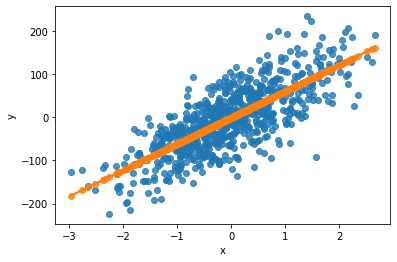

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x = 'x',y = 'y',data = train1,fit_reg=False)
sns.regplot(x = 'x',y = predicted1,data = train1)

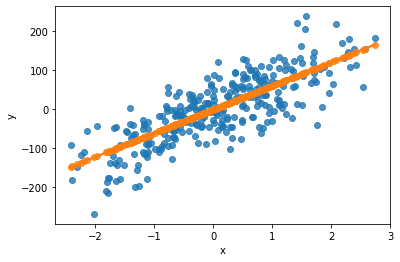

In [ ]:
sns.regplot(x = 'x',y = 'y',data = test1,fit_reg=False)
sns.regplot(x = 'x',y = test_predicted1,data = test1)

### Polynomial of degree 2

In [ ]:
D2 = D.copy()
D2.insert(1,"x^2",D2['x']**2)
D2.head()

,x,x^2,y
0,-1.700845,2.892874,-82.046634
1,-1.192233,1.421420,-39.912413
2,0.696472,0.485073,44.887208
3,1.212984,1.471330,10.039649
4,-0.387337,0.150030,-28.733513


In [ ]:
test_size = 300
test2 = D2.iloc[-test_size:]
train2 = D2.iloc[:-test_size]
train_data2 = np.asarray(train2)
test_data2 = np.asarray(test2)
X2 = train_data2[:,:-1] 
r2 = train_data2[:,-1:] 
test_X2 = test_data2[:,:-1]
test_r2 = test_data2[:,-1:]
ones2 = np.ones((len(X2),1))
Dmat2 = np.hstack((ones2,X2))
ones2 = np.ones((len(test_X2),1))
test_Dmat2 = np.hstack((ones2,test_X2))

In [ ]:
length2 = Dmat2.shape[1]
lin = LR_Norm_Eqn(length2)
print('Weights are ',lin.fit(Dmat2,r2))

Weights are  [[ 2.20546785e-02]
 [ 6.09162873e+01]
 [-1.40604110e+00]]


In [ ]:
predicted2 = lin.predict(Dmat2,r2)
test_predicted2 = lin.predict(test_Dmat2,test_r2)
print("Error with train data: ",lin.measure(predicted2,r2))
print("Error eith test data: ",lin.measure(test_predicted2,test_r2))

Error with train data:  2496.8236756794636
Error eith test data:  2650.7786773152225


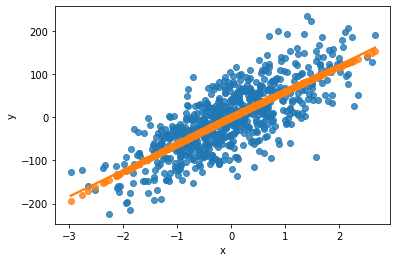

In [ ]:
sns.regplot(x = 'x',y = 'y',data = train2,fit_reg=False)
sns.regplot(x = 'x',y = predicted2,data = train2)

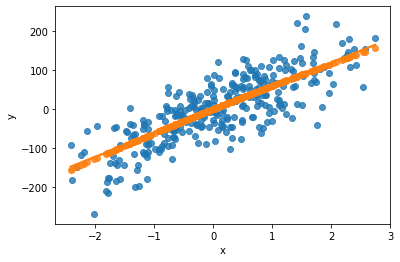

In [ ]:
sns.regplot(x = 'x',y = 'y',data = test2,fit_reg=False)
sns.regplot(x = 'x',y = test_predicted2,data = test2)

### Polynomial of degree 3

In [ ]:
D3 = D.copy()
D3.insert(1,"x^2",D3['x']**2)
D3.insert(2,"x^3",D3['x']**3)
D3.head()

,x,x^2,x^3,y
0,-1.700845,2.892874,-4.920331,-82.046634
1,-1.192233,1.421420,-1.694665,-39.912413
2,0.696472,0.485073,0.337840,44.887208
3,1.212984,1.471330,1.784701,10.039649
4,-0.387337,0.150030,-0.058112,-28.733513


In [ ]:
test_size = 300
test3 = D3.iloc[-test_size:]
train3 = D3.iloc[:-test_size]
train_data3 = np.asarray(train3)
test_data3 = np.asarray(test3)
X3 = train_data3[:,:-1] 
r3 = train_data3[:,-1:] 
test_X3 = test_data3[:,:-1]
test_r3 = test_data3[:,-1:]
ones3 = np.ones((len(X3),1))
Dmat3 = np.hstack((ones3,X3))
ones3 = np.ones((len(test_X3),1))
test_Dmat3 = np.hstack((ones3,test_X3))

In [ ]:
length3 = Dmat3.shape[1]
lin = LR_Norm_Eqn(length3)
print('Weights are ',lin.fit(Dmat3,r3))

Weights are  [[ 0.13032614]
 [62.57953153]
 [-1.47185066]
 [-0.61009782]]


In [ ]:
predicted3 = lin.predict(Dmat3,r3)
test_predicted3= lin.predict(test_Dmat3,test_r3)
print("Error with train data: ",lin.measure(predicted3,r3))
print("Error eith test data: ",lin.measure(test_predicted3,test_r3))

Error with train data:  2495.546189712305
Error eith test data:  2650.292315305985


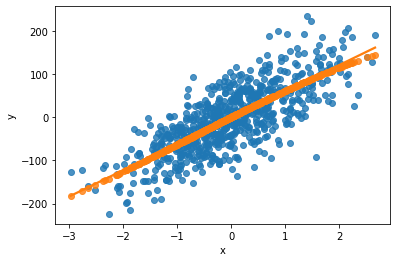

In [ ]:
sns.regplot(x = 'x',y = 'y',data = train3,fit_reg=False)
sns.regplot(x = 'x',y = predicted3,data = train3)

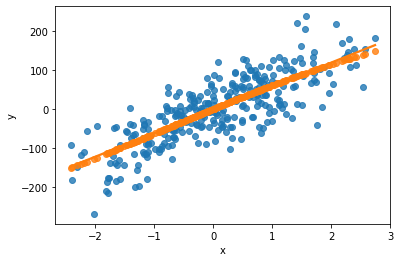

In [ ]:
sns.regplot(x = 'x',y = 'y',data = test3,fit_reg=False)
sns.regplot(x = 'x',y = test_predicted3,data = test3)

In [ ]:
D1 = D.copy()
test_size = 300
test1 = D1.iloc[-test_size:]
train1 = D1.iloc[:-test_size]
train_data1 = np.asarray(train1)
test_data1 = np.asarray(test1)
X1 = train_data1[:,:-1] 
r1 = train_data1[:,-1:] 
test_X1 = test_data1[:,:-1]
test_r1 = test_data1[:,-1:]
ones1 = np.ones((len(X1),1))
Dmat1 = np.hstack((ones1,X1))
ones1 = np.ones((len(test_X1),1))
test_Dmat1 = np.hstack((ones1,test_X1))

In [ ]:
y0 = predict_unknown[0] + predict_unknown[1]*25 + predict_unknown[2]*25
y0

array([625.])

## **8. Consider a dataset D which has two input features with 500 data points. You can either download a dataset or generate a synthetic dataset. Implement a multiple linear regression model and learn the curve that best fits the dataset, subject to the following condition**

In [ ]:
from sklearn.datasets import make_regression

variables, target = make_regression(n_samples=500, n_features=1)
df = pd.DataFrame(variables)
df['target'] = target

In [ ]:
df.set_axis(['X1','Y'], axis=1, inplace=False)

,X1,Y
0,-0.324513,-4.682528
1,0.150629,2.173485
2,0.452208,6.525073
3,-0.802664,-11.581937
4,0.946896,13.663122
...,...,...
495,-0.742895,-10.719513
496,-0.410345,-5.921029
497,0.652914,9.421139
498,0.902370,13.020640


Experiment 1: Training data : test data is 70:30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.30, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 1.4084071210872042e-15
Test Mean Absolute Error 2.747061837264179e-15
Performance 2.0777344791756916e-15


Experiment 2: Training data : test data is 60:40

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.40, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 4.450733763021001e-15
Test Mean Absolute Error 1.2127798765249054e-15
Performance 2.831756819772953e-15


Experiment 3: Training data : test data is 50:50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.50, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 4.375791395894169e-15
Test Mean Absolute Error 5.5911941743147505e-15
Performance 4.98349278510446e-15


Experiment 4: Training data : test data is 40:60

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.60, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 1.7927499762482314e-15
Test Mean Absolute Error 1.3219980665724052e-15
Performance 1.5573740214103184e-15


Experiment 5: Training data : test data is 30:70

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.70, random_state=42)
# Creating instance of Linear Regresssion with Normalised Data
lr1 = LR(normalize = True)
lr2 = LR(normalize = True)
# Predicting over the Train Set and calculating error
lr1.fit(X_train, y_train)
train_predict = lr1.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k)
# Predicting over the Test Set and calculating error
lr2.fit(X_test, y_test)
test_predict = lr2.predict(X_test)
l = mae(test_predict,y_test)
print('Test Mean Absolute Error', l)
#  Performance of model as the average of the error contributed by the training dataset and the error contributed by the test data.
print('Performance', (k+l)/2)

Training Mean Absolute Error 3.16436691664516e-15
Test Mean Absolute Error 2.794589956270751e-15
Performance 2.9794784364579557e-15


Conclusion = If we compare the Training Mean Abslute error of all the 5 experiment under the same hypothesis w0 + w1x we find Experment 2 have the least vaue hence the most accuracy i.e. 60:40.

## **9.Consider a dataset (of your choice) which has two input features and 1000 data points. Consider K=200. Train Multiple linear regression model with a hypothesis (of your choice). Compute the performance measure of your model with a k-fold cross validation method.**

In [ ]:
D = pd.read_csv("/content/gdrive/MyDrive/Datasets/car-sales.csv", na_values=['??','???','????'])
D.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
D.drop(['Make', 'Colour'], axis=1, inplace=True)

In [ ]:
D.head()

,Odometer (KM),Doors,Price
0,35431.0,4.0,15323.0
1,192714.0,5.0,19943.0
2,84714.0,4.0,28343.0
3,154365.0,4.0,13434.0
4,181577.0,3.0,14043.0


In [ ]:
D.isna().sum()

Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
D['Odometer (KM)'] = mean_imputer.fit_transform(D['Odometer (KM)'].values.reshape(-1,1))[:,0]
D['Doors'] = mean_imputer.fit_transform(D['Doors'].values.reshape(-1,1))[:,0]
D['Price'] = mean_imputer.fit_transform(D['Price'].values.reshape(-1,1))[:,0]

In [ ]:
D.isna().sum()

Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
D.head()

,Odometer (KM),Doors,Price
0,35431.0,4.0,15323.0
1,192714.0,5.0,19943.0
2,84714.0,4.0,28343.0
3,154365.0,4.0,13434.0
4,181577.0,3.0,14043.0


Text(0, 0.5, 'Price')

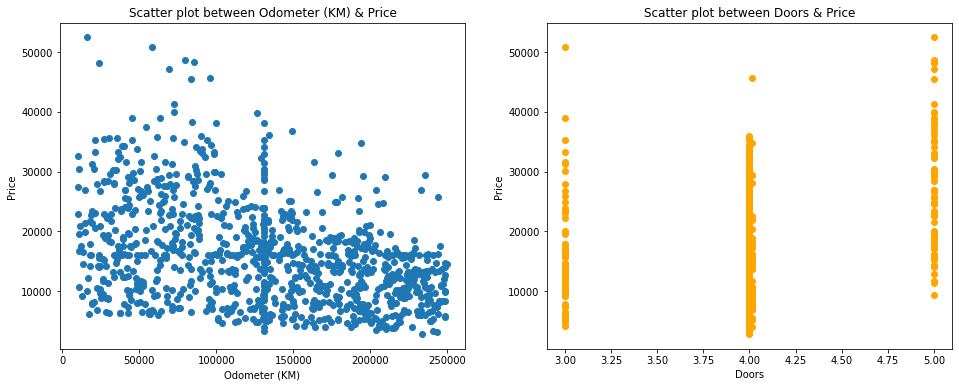

In [ ]:
# plot regplots for Odometer (KM), Doors against Price
plt.figure(figsize=(16,6))
# Odometer (KM) Vs Price
plt.subplot(1,2,1)
plt.scatter(D['Odometer (KM)'], D['Price'])
plt.title("Scatter plot between Odometer (KM) & Price")
plt.xlabel("Odometer (KM)")
plt.ylabel("Price")

# Doors Vs Price
plt.subplot(1, 2, 2)
plt.scatter(D['Doors'], D['Price'], color="orange")
plt.title("Scatter plot between Doors & Price")
plt.xlabel("Doors")
plt.ylabel("Price")

In [ ]:
# Separating the independent and dependent variable.
X_multi_lreg = D.drop('Price', axis = 1).values
y_multi_lreg = D["Price"].values.reshape(-1,1)

In [ ]:
X_multi_lreg

array([[3.54310e+04, 4.00000e+00],
       [1.92714e+05, 5.00000e+00],
       [8.47140e+04, 4.00000e+00],
       ...,
       [6.66040e+04, 4.00000e+00],
       [2.15883e+05, 4.00000e+00],
       [2.48360e+05, 4.00000e+00]])

In [ ]:
y_multi_lreg

array([[15323.        ],
       [19943.        ],
       [28343.        ],
       [13434.        ],
       [14043.        ],
       [23883.        ],
       [ 8473.        ],
       [20306.        ],
       [ 9374.        ],
       [26683.        ],
       [16259.        ],
       [ 6160.        ],
       [16909.        ],
       [11121.        ],
       [18946.        ],
       [16290.        ],
       [34465.        ],
       [17177.        ],
       [ 9109.        ],
       [ 6010.        ],
       [24130.        ],
       [29653.        ],
       [22489.        ],
       [21242.        ],
       [14274.        ],
       [15686.        ],
       [13344.        ],
       [10984.        ],
       [ 6135.        ],
       [13586.        ],
       [23929.        ],
       [ 6866.        ],
       [ 9330.        ],
       [ 9780.        ],
       [17516.        ],
       [ 8738.        ],
       [23438.        ],
       [15131.        ],
       [ 9224.        ],
       [ 6574.        ],


In [ ]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_mlreg, X_val_mlreg, y_train_mlreg, y_val_mlreg = train_test_split(X_multi_lreg,y_multi_lreg, test_size = 0.25, random_state = 42)
print('Train Dataset : ', X_train_mlreg.shape, y_train_mlreg.shape)
print('Test Dataset : ', X_val_mlreg.shape, y_val_mlreg.shape)

Train Dataset :  (750, 2) (750, 1)
Test Dataset :  (250, 2) (250, 1)


In [ ]:
'''X_train_mlreg = scaler.fit_transform(X_train_mlreg)
X_test_mlreg = scaler.transform(X_val_mlreg) '''

'X_train_mlreg = scaler.fit_transform(X_train_mlreg)\nX_test_mlreg = scaler.transform(X_val_mlreg) '

In [ ]:
multi_lreg = LR()
multi_lreg.fit(X_train_mlreg, y_train_mlreg)
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_.size)

Intercept :  [4480.18741331]
Slope :  2


In [ ]:
 # Use the model to predict the test dataset.
y_mlreg_pred_val = multi_lreg.predict(X_val_mlreg)

# Use the model to predict the train dataset.
y_mlreg_pred_train = multi_lreg.predict(X_train_mlreg)

In [ ]:
# Calculate the eualuation metrics of the model.
rmse_mlreg = (mean_squared_error(y_mlreg_pred_val, y_val_mlreg))
print('root mean squared error for multi linear reg : ', rmse_mlreg)

root mean squared error for multi linear reg :  63610243.725358956


In [ ]:
from sklearn.metrics import r2_score
r2_score_mlreg_train = r2_score(y_mlreg_pred_train, y_train_mlreg)
r2_score_mlreg_val = r2_score(y_mlreg_pred_val, y_val_mlreg)
print('r2_ score for train dataset for multi linear reg : ', r2_score_mlreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg_val)

r2_ score for train dataset for multi linear reg :  -3.366684051716323
r2_ score for test dataset for multi linear reg :  -3.60817069790095


In [ ]:
lm = LR()
scores = cross_val_score(lm, X_multi_lreg, y_multi_lreg, scoring='r2', cv=200)
scores

array([-7.31783177e-02,  4.22063367e-01, -1.75307709e+00,  2.62893234e-01,
       -8.27853745e-01, -3.57415176e+00,  3.55956186e-01,  2.50002658e-01,
       -2.77898725e-01,  1.63206267e-01, -3.70164133e-01,  2.69829605e-01,
        1.55568760e-01,  2.42969213e-01,  3.33062553e-02,  3.39926476e-01,
       -1.58955090e-02,  1.15635813e-01, -1.81126218e+00, -1.63315462e+00,
       -2.48611517e+00, -1.81883432e-01,  5.03274289e-01,  2.15110370e-01,
       -3.04883977e-01, -3.65338653e-01, -3.63090008e+01,  2.22036686e-01,
       -2.14831272e+00, -1.04651775e+00, -5.57295575e-01,  1.86722679e-01,
        2.26216702e-01,  1.06683214e-01,  5.85777077e-01,  2.46626971e-01,
       -2.43481730e+00,  2.79707648e-01, -2.00451317e+01, -1.77633630e-01,
       -3.19542548e-01,  1.88633231e-02, -2.08516835e-01,  2.24650618e-01,
       -3.70676667e-01,  2.63876176e-01, -1.12859900e-01, -2.79736577e-01,
       -3.75691843e-02, -3.79402177e-01, -2.54756688e-01, -1.76261319e+00,
       -1.49090196e-01,  

In [ ]:
print('r2_ score for train dataset for multi linear reg with 200 K-fold cross validation: ', scores.mean())

r2_ score for train dataset for multi linear reg with 200 K-fold cross validation:  -0.5986935265186603


## **10. Downlaod a real-time dataset which has a minimum of 500 datapoints and which could train a regression model. With D, Train a multiple linear regression model with polynomial of degree 1 (with all the terms), considering all the input features of the dataset . Compute the error due due to the test data set and the error due to training data set ( split the data set into training data : test data in the ratio 75:25) Also, predict the traget output for an unknown input.**

In [ ]:
D = pd.read_csv("/content/gdrive/MyDrive/Datasets/car-sales.csv", na_values=["??", "NaN", "###"])
D.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
D = D[:500]

In [ ]:
D.drop(["Make", "Colour"], axis=1, inplace=True)

In [ ]:
D.isna().sum()

Odometer (KM)    25
Doors            28
Price            17
dtype: int64

In [ ]:
D.dropna(inplace=True)

In [ ]:
test_size = 125

In [ ]:
test_dataframe = D.iloc[-test_size:]
test_dataframe

,Odometer (KM),Doors,Price
354,196835.0,4.0,15623.0
355,106744.0,4.0,16223.0
356,96363.0,4.0,7469.0
358,103283.0,3.0,22176.0
361,164093.0,4.0,3893.0
...,...,...,...
495,181572.0,5.0,25763.0
496,186752.0,4.0,7882.0
497,209976.0,4.0,4200.0
498,81764.0,4.0,29004.0


In [ ]:
D = D.iloc[:-test_size]
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Odometer (KM)  307 non-null    float64
 1   Doors          307 non-null    float64
 2   Price          307 non-null    float64
dtypes: float64(3)
memory usage: 9.6 KB


In [ ]:
data = np.asarray(D)
test_data = np.asarray(test_dataframe)
(data)

array([[3.54310e+04, 4.00000e+00, 1.53230e+04],
       [1.92714e+05, 5.00000e+00, 1.99430e+04],
       [8.47140e+04, 4.00000e+00, 2.83430e+04],
       [1.54365e+05, 4.00000e+00, 1.34340e+04],
       [1.81577e+05, 3.00000e+00, 1.40430e+04],
       [4.26520e+04, 4.00000e+00, 2.38830e+04],
       [1.63453e+05, 4.00000e+00, 8.47300e+03],
       [1.30538e+05, 4.00000e+00, 9.37400e+03],
       [5.10290e+04, 4.00000e+00, 2.66830e+04],
       [1.67421e+05, 4.00000e+00, 1.62590e+04],
       [1.71190e+04, 4.00000e+00, 6.16000e+03],
       [1.02303e+05, 4.00000e+00, 1.69090e+04],
       [1.34181e+05, 4.00000e+00, 1.11210e+04],
       [1.99833e+05, 4.00000e+00, 1.89460e+04],
       [2.05592e+05, 4.00000e+00, 1.62900e+04],
       [9.67420e+04, 4.00000e+00, 3.44650e+04],
       [1.94189e+05, 5.00000e+00, 1.71770e+04],
       [6.79910e+04, 3.00000e+00, 9.10900e+03],
       [2.15820e+05, 4.00000e+00, 6.01000e+03],
       [1.24844e+05, 4.00000e+00, 2.41300e+04],
       [3.06150e+04, 4.00000e+00, 2.9653

In [ ]:
X = data[:,:-1] # input attributes include all column except last
r = data[:,-1:] # output attribute include last column only

In [ ]:
test_data

array([[1.96835e+05, 4.00000e+00, 1.56230e+04],
       [1.06744e+05, 4.00000e+00, 1.62230e+04],
       [9.63630e+04, 4.00000e+00, 7.46900e+03],
       [1.03283e+05, 3.00000e+00, 2.21760e+04],
       [1.64093e+05, 4.00000e+00, 3.89300e+03],
       [1.19745e+05, 4.00000e+00, 2.39020e+04],
       [1.32660e+04, 4.00000e+00, 1.45020e+04],
       [1.45850e+05, 4.00000e+00, 1.78760e+04],
       [2.44200e+04, 4.00000e+00, 1.41980e+04],
       [2.13324e+05, 4.00000e+00, 8.70400e+03],
       [3.48220e+04, 4.00000e+00, 1.46130e+04],
       [1.80473e+05, 4.00000e+00, 6.56800e+03],
       [1.33069e+05, 3.00000e+00, 5.00800e+03],
       [7.12830e+04, 4.00000e+00, 7.49700e+03],
       [2.35450e+04, 4.00000e+00, 1.39320e+04],
       [1.78774e+05, 4.00000e+00, 1.50470e+04],
       [1.12223e+05, 4.00000e+00, 4.75300e+03],
       [1.98570e+05, 4.00000e+00, 1.72840e+04],
       [2.14493e+05, 4.00000e+00, 1.24340e+04],
       [6.43620e+04, 4.00000e+00, 2.89930e+04],
       [1.04304e+05, 4.00000e+00, 2.3017

In [ ]:
test_X = test_data[:,:-1]
test_r = test_data[:,-1:]

In [ ]:
X

array([[3.54310e+04, 4.00000e+00],
       [1.92714e+05, 5.00000e+00],
       [8.47140e+04, 4.00000e+00],
       [1.54365e+05, 4.00000e+00],
       [1.81577e+05, 3.00000e+00],
       [4.26520e+04, 4.00000e+00],
       [1.63453e+05, 4.00000e+00],
       [1.30538e+05, 4.00000e+00],
       [5.10290e+04, 4.00000e+00],
       [1.67421e+05, 4.00000e+00],
       [1.71190e+04, 4.00000e+00],
       [1.02303e+05, 4.00000e+00],
       [1.34181e+05, 4.00000e+00],
       [1.99833e+05, 4.00000e+00],
       [2.05592e+05, 4.00000e+00],
       [9.67420e+04, 4.00000e+00],
       [1.94189e+05, 5.00000e+00],
       [6.79910e+04, 3.00000e+00],
       [2.15820e+05, 4.00000e+00],
       [1.24844e+05, 4.00000e+00],
       [3.06150e+04, 4.00000e+00],
       [1.48744e+05, 4.00000e+00],
       [1.30075e+05, 4.00000e+00],
       [1.72718e+05, 4.00000e+00],
       [1.25819e+05, 4.00000e+00],
       [1.80390e+05, 4.00000e+00],
       [8.27830e+04, 4.00000e+00],
       [5.66870e+04, 4.00000e+00],
       [1.12004e+05,

In [ ]:
r

array([[15323.],
       [19943.],
       [28343.],
       [13434.],
       [14043.],
       [23883.],
       [ 8473.],
       [ 9374.],
       [26683.],
       [16259.],
       [ 6160.],
       [16909.],
       [11121.],
       [18946.],
       [16290.],
       [34465.],
       [17177.],
       [ 9109.],
       [ 6010.],
       [24130.],
       [29653.],
       [22489.],
       [21242.],
       [14274.],
       [15686.],
       [13344.],
       [10984.],
       [ 6135.],
       [13586.],
       [23929.],
       [ 9330.],
       [ 9780.],
       [17516.],
       [ 8738.],
       [23438.],
       [ 9224.],
       [ 6574.],
       [ 9229.],
       [ 7100.],
       [ 6337.],
       [19085.],
       [ 5743.],
       [ 5925.],
       [25196.],
       [ 6075.],
       [ 9928.],
       [ 7445.],
       [17422.],
       [ 8269.],
       [ 9918.],
       [48686.],
       [15662.],
       [19186.],
       [11479.],
       [12883.],
       [24668.],
       [12172.],
       [25068.],
       [20370.

In [ ]:
ones = np.ones((len(X),1))

In [ ]:
dataframe = np.hstack((ones,X))
dataframe

array([[1.00000e+00, 3.54310e+04, 4.00000e+00],
       [1.00000e+00, 1.92714e+05, 5.00000e+00],
       [1.00000e+00, 8.47140e+04, 4.00000e+00],
       [1.00000e+00, 1.54365e+05, 4.00000e+00],
       [1.00000e+00, 1.81577e+05, 3.00000e+00],
       [1.00000e+00, 4.26520e+04, 4.00000e+00],
       [1.00000e+00, 1.63453e+05, 4.00000e+00],
       [1.00000e+00, 1.30538e+05, 4.00000e+00],
       [1.00000e+00, 5.10290e+04, 4.00000e+00],
       [1.00000e+00, 1.67421e+05, 4.00000e+00],
       [1.00000e+00, 1.71190e+04, 4.00000e+00],
       [1.00000e+00, 1.02303e+05, 4.00000e+00],
       [1.00000e+00, 1.34181e+05, 4.00000e+00],
       [1.00000e+00, 1.99833e+05, 4.00000e+00],
       [1.00000e+00, 2.05592e+05, 4.00000e+00],
       [1.00000e+00, 9.67420e+04, 4.00000e+00],
       [1.00000e+00, 1.94189e+05, 5.00000e+00],
       [1.00000e+00, 6.79910e+04, 3.00000e+00],
       [1.00000e+00, 2.15820e+05, 4.00000e+00],
       [1.00000e+00, 1.24844e+05, 4.00000e+00],
       [1.00000e+00, 3.06150e+04, 4.0000

In [ ]:
 ones = np.ones((len(test_X),1))

In [ ]:
test_dataframe = np.hstack((ones,test_X))
test_dataframe

array([[1.00000e+00, 1.96835e+05, 4.00000e+00],
       [1.00000e+00, 1.06744e+05, 4.00000e+00],
       [1.00000e+00, 9.63630e+04, 4.00000e+00],
       [1.00000e+00, 1.03283e+05, 3.00000e+00],
       [1.00000e+00, 1.64093e+05, 4.00000e+00],
       [1.00000e+00, 1.19745e+05, 4.00000e+00],
       [1.00000e+00, 1.32660e+04, 4.00000e+00],
       [1.00000e+00, 1.45850e+05, 4.00000e+00],
       [1.00000e+00, 2.44200e+04, 4.00000e+00],
       [1.00000e+00, 2.13324e+05, 4.00000e+00],
       [1.00000e+00, 3.48220e+04, 4.00000e+00],
       [1.00000e+00, 1.80473e+05, 4.00000e+00],
       [1.00000e+00, 1.33069e+05, 3.00000e+00],
       [1.00000e+00, 7.12830e+04, 4.00000e+00],
       [1.00000e+00, 2.35450e+04, 4.00000e+00],
       [1.00000e+00, 1.78774e+05, 4.00000e+00],
       [1.00000e+00, 1.12223e+05, 4.00000e+00],
       [1.00000e+00, 1.98570e+05, 4.00000e+00],
       [1.00000e+00, 2.14493e+05, 4.00000e+00],
       [1.00000e+00, 6.43620e+04, 4.00000e+00],
       [1.00000e+00, 1.04304e+05, 4.0000

In [ ]:
class LR_Norm_Eqn:
  def __init__(self,m):
    # number of attributes 'm' is passed as an argument
    self.weights = np.zeros([m,1])

  def predict(self, D, R): # retruns predicted 'r'
    temp = np.dot(D, self.weights)
    return temp

  def measure(self, predicted, actual): # returns mean squared error
    temp = predicted- actual
    m = len(predicted) # number of records
    return (np.sum(np.power(temp, 2))) // (m)

  def fit(self,D,R):
    D_transpose = np.transpose(D)
    D_trans_dot_D_Inv = np.linalg.inv(D_transpose.dot(D))
    D_trans_R = D_transpose.dot(R)
    self.weights = D_trans_dot_D_Inv.dot(D_trans_R)
    return self.weights

In [ ]:
length = D.shape[1]
lin = LR_Norm_Eqn(length)
print('weights is ',lin.fit(D,r))

weights is  [[ 4.63898240e-17]
 [-5.23606696e-12]
 [ 1.00000000e+00]]


In [ ]:
# mean sqaured error of training data
# predicted values of r
predicted = lin.predict(D,r)
predicted

array([[15323.],
       [19943.],
       [28343.],
       [13434.],
       [14043.],
       [23883.],
       [ 8473.],
       [ 9374.],
       [26683.],
       [16259.],
       [ 6160.],
       [16909.],
       [11121.],
       [18946.],
       [16290.],
       [34465.],
       [17177.],
       [ 9109.],
       [ 6010.],
       [24130.],
       [29653.],
       [22489.],
       [21242.],
       [14274.],
       [15686.],
       [13344.],
       [10984.],
       [ 6135.],
       [13586.],
       [23929.],
       [ 9330.],
       [ 9780.],
       [17516.],
       [ 8738.],
       [23438.],
       [ 9224.],
       [ 6574.],
       [ 9229.],
       [ 7100.],
       [ 6337.],
       [19085.],
       [ 5743.],
       [ 5925.],
       [25196.],
       [ 6075.],
       [ 9928.],
       [ 7445.],
       [17422.],
       [ 8269.],
       [ 9918.],
       [48686.],
       [15662.],
       [19186.],
       [11479.],
       [12883.],
       [24668.],
       [12172.],
       [25068.],
       [20370.

In [ ]:
# predicted values of r
test_predicted = lin.predict(test_dataframe,test_r)
test_predicted

array([[3.99999897],
       [3.99999944],
       [3.9999995 ],
       [2.99999946],
       [3.99999914],
       [3.99999937],
       [3.99999993],
       [3.99999924],
       [3.99999987],
       [3.99999888],
       [3.99999982],
       [3.99999906],
       [2.9999993 ],
       [3.99999963],
       [3.99999988],
       [3.99999906],
       [3.99999941],
       [3.99999896],
       [3.99999888],
       [3.99999966],
       [3.99999945],
       [3.99999963],
       [3.9999996 ],
       [3.99999873],
       [3.99999946],
       [3.99999925],
       [3.99999897],
       [3.99999953],
       [2.99999991],
       [3.99999953],
       [3.99999987],
       [3.99999908],
       [3.99999907],
       [3.99999881],
       [2.99999955],
       [3.99999956],
       [3.9999989 ],
       [3.99999899],
       [2.99999951],
       [3.99999918],
       [3.99999881],
       [3.9999992 ],
       [3.99999994],
       [2.99999926],
       [3.9999989 ],
       [3.9999991 ],
       [3.99999911],
       [3.999

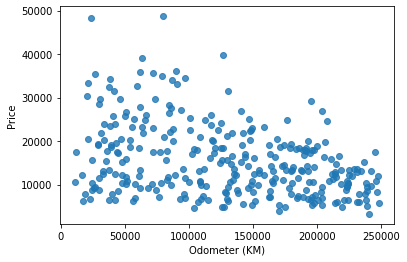

In [ ]:
sns.regplot(x = 'Odometer (KM)',y = 'Price', data = D, fit_reg=False) 
#plt.scatter(D["Odometer (KM)"], D["Price"])
#set(xlim=(0,6),ylim=(0,6))
#sns.regplot(x = 'x1',y = predicted,data = dataframe)

Text(0.5, 0, 'Price')

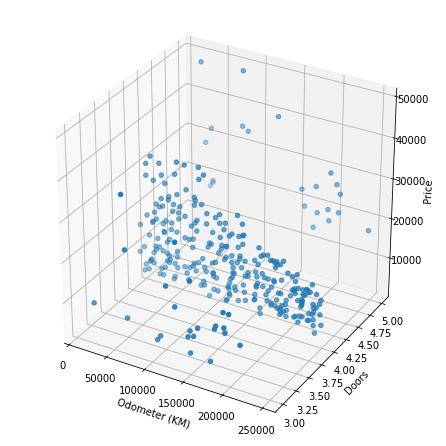

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(D['Odometer (KM)'], D['Doors'], D['Price'])
#ax.scatter(dataframe['x2'], dataframe['x1'], predicted)
ax.set_xlabel('Odometer (KM)')
ax.set_ylabel('Doors')
ax.set_zlabel('Price')

In [ ]:
print(lin.measure(predicted,r))

0.0


In [ ]:
print(lin.measure(test_predicted,test_r))

311481682.0


In [ ]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(predicted, r)
r2_score_test = r2_score(test_predicted, test_r)
print('r2_ score for train dataset for multi linear reg : ', r2_score_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_test)

r2_ score for train dataset for multi linear reg :  1.0
r2_ score for test dataset for multi linear reg :  -2300048084.707515


In [ ]:
# Predict an unknown value 
predict_unknown = lin.predict(25, 25)
predict_unknown

array([[ 1.15974560e-15],
       [-1.30901674e-10],
       [ 2.50000000e+01]])